In [2]:
import cv2
import imutils
import requests
import numpy as np
from requests import get
from numpy import asarray
from skimage.measure import compare_ssim
from IPython.display import Image, display

In [3]:
def show_img(img):
    return Image(cv2.imencode('.webp', img)[1])


def show_all_imgs(*imgs):
    return display(*[show_img(i) for i in imgs])


def pixel_size(dim):
    return int(dim / 60)


def url_to_img(url):
    temp = asarray(bytearray(get(url).content), dtype="uint8")
    return cv2.imdecode(temp, cv2.IMREAD_COLOR)

In [7]:
def compare_imgs(orig_url, pixel_url):
    orig = url_to_img(orig_url)
    pixel = url_to_img(pixel_url)
    
    # Get input size
    height, width = orig.shape[:2]

    # Desired "pixelated" size
    h, w = (11, 15) if width > height else (15, 11) # (pixel_size(d) for d in (height, width))

    # Resize input to "pixelated" size
    temp = cv2.resize(orig, (w, h), interpolation=cv2.INTER_LINEAR)

    # Initialize output image
    converted = cv2.resize(temp, pixel.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

    # convert the images to grayscale
    grayA = cv2.cvtColor(pixel, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(converted, cv2.COLOR_BGR2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
#     diff = (diff * 255).astype("uint8")
#     print("SSIM: {}".format(score))

    return converted, score

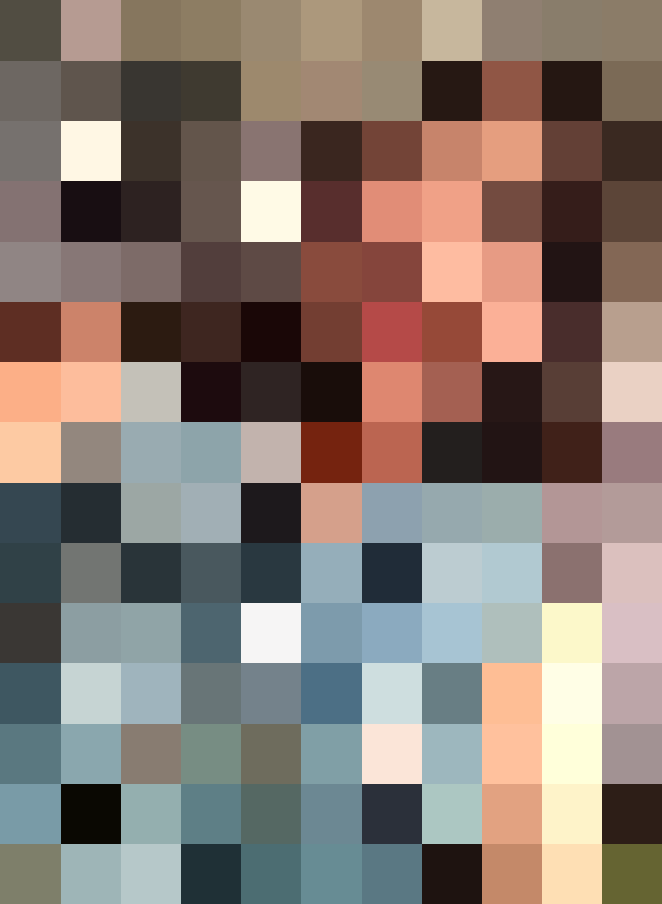

In [49]:
# pixelate original image

orig = cv2.imread('images/0/1.webp')
pixel = cv2.imread('images/0/0.webp')

# Get input size
height, width = orig.shape[:2]

# Desired "pixelated" size
h, w = (pixel_size(d) for d in (height, width))

# Resize input to "pixelated" size
temp = cv2.resize(orig, (w, h), interpolation=cv2.INTER_LINEAR)

# Initialize output image
converted = cv2.resize(temp, pixel.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

show_img(converted)

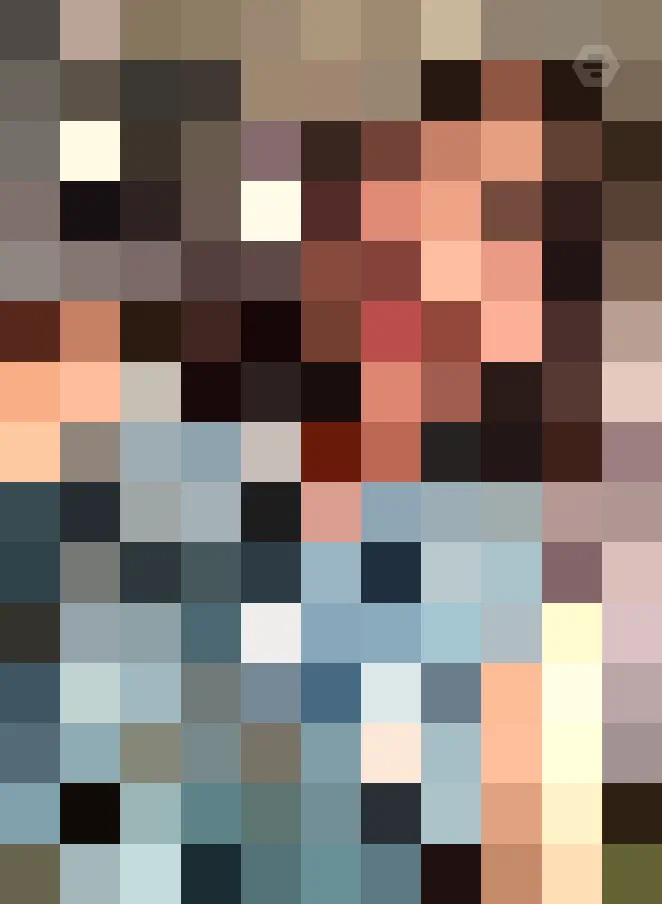

In [20]:
show_img(pixel)

In [36]:
# compare converted pixelation to original pixelation

# convert the images to grayscale
grayA = cv2.cvtColor(pixel, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(converted, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9542820404903833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


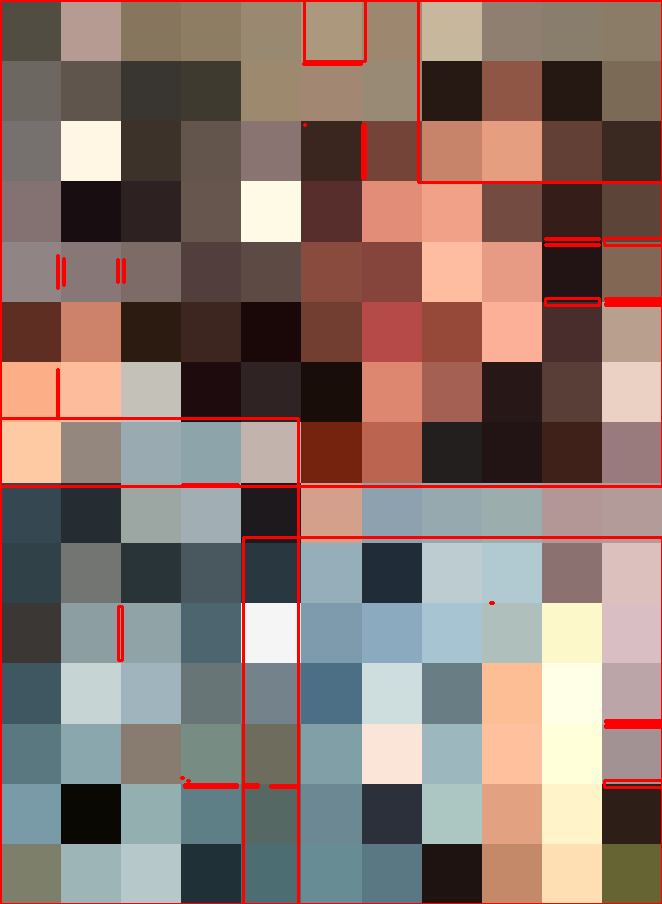

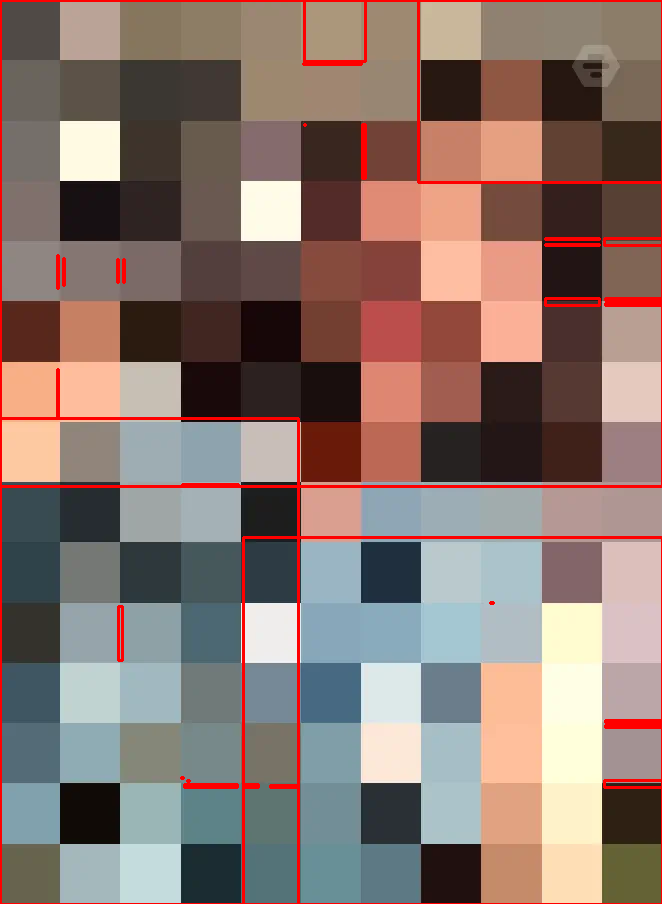

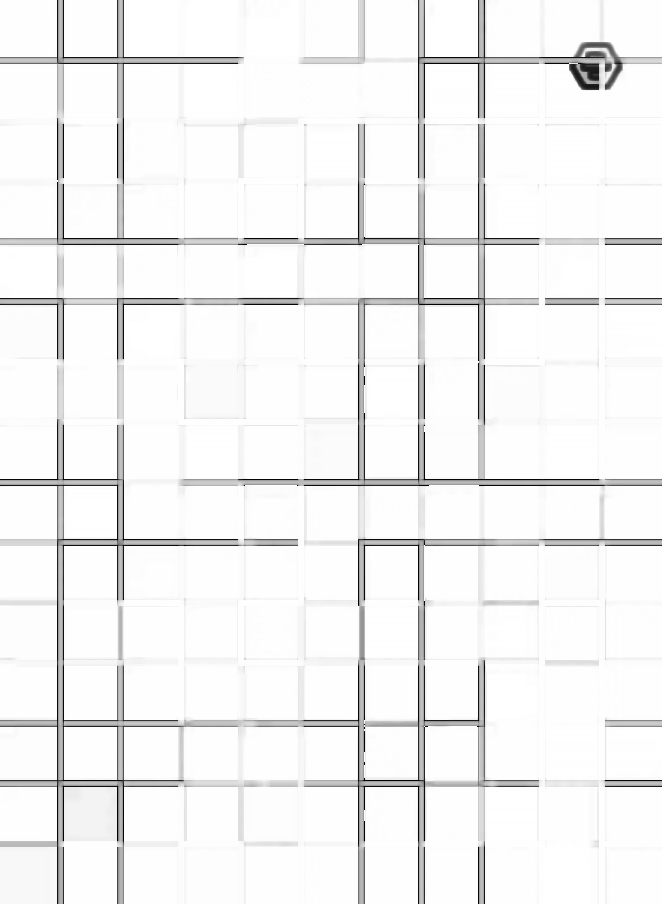

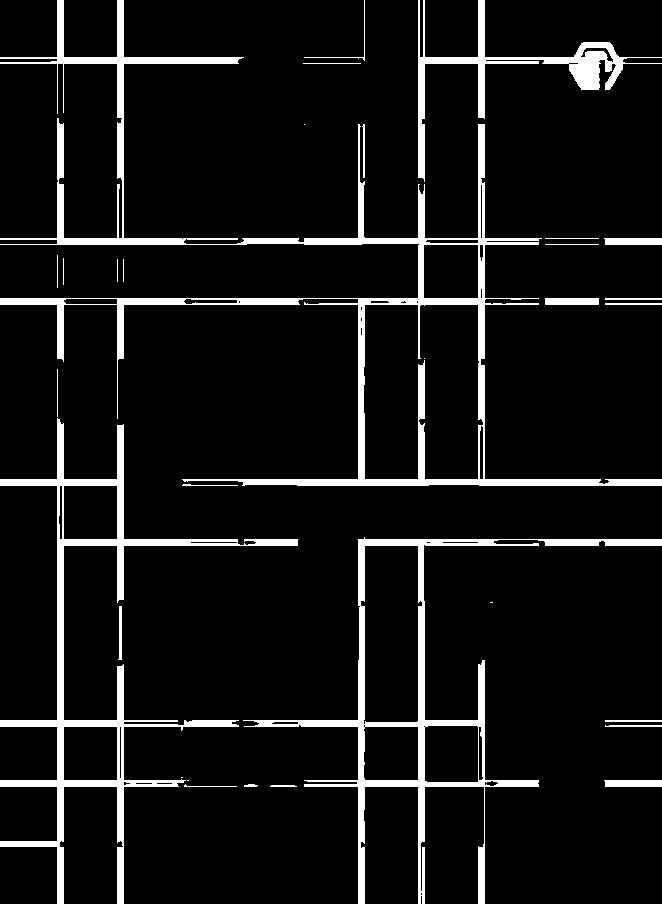

In [61]:
# shows the difference between the converted image and the original pixelated image
# not important for bot function 

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(converted, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(pixel, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
show_all_imgs(converted, pixel, diff, thresh)

In [63]:
import requests
import numpy as np

url = 'http://www.pyimagesearch.com/wp-content/uploads/2015/01/google_logo.png'
resp = requests.get(url)

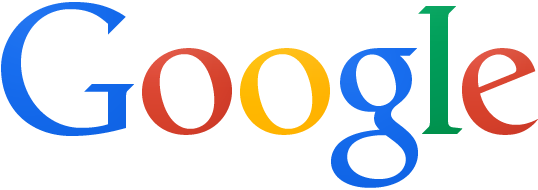

In [65]:
image = np.asarray(bytearray(resp.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
show_img(image)

In [66]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

SSIM: 0.9776478169877642


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


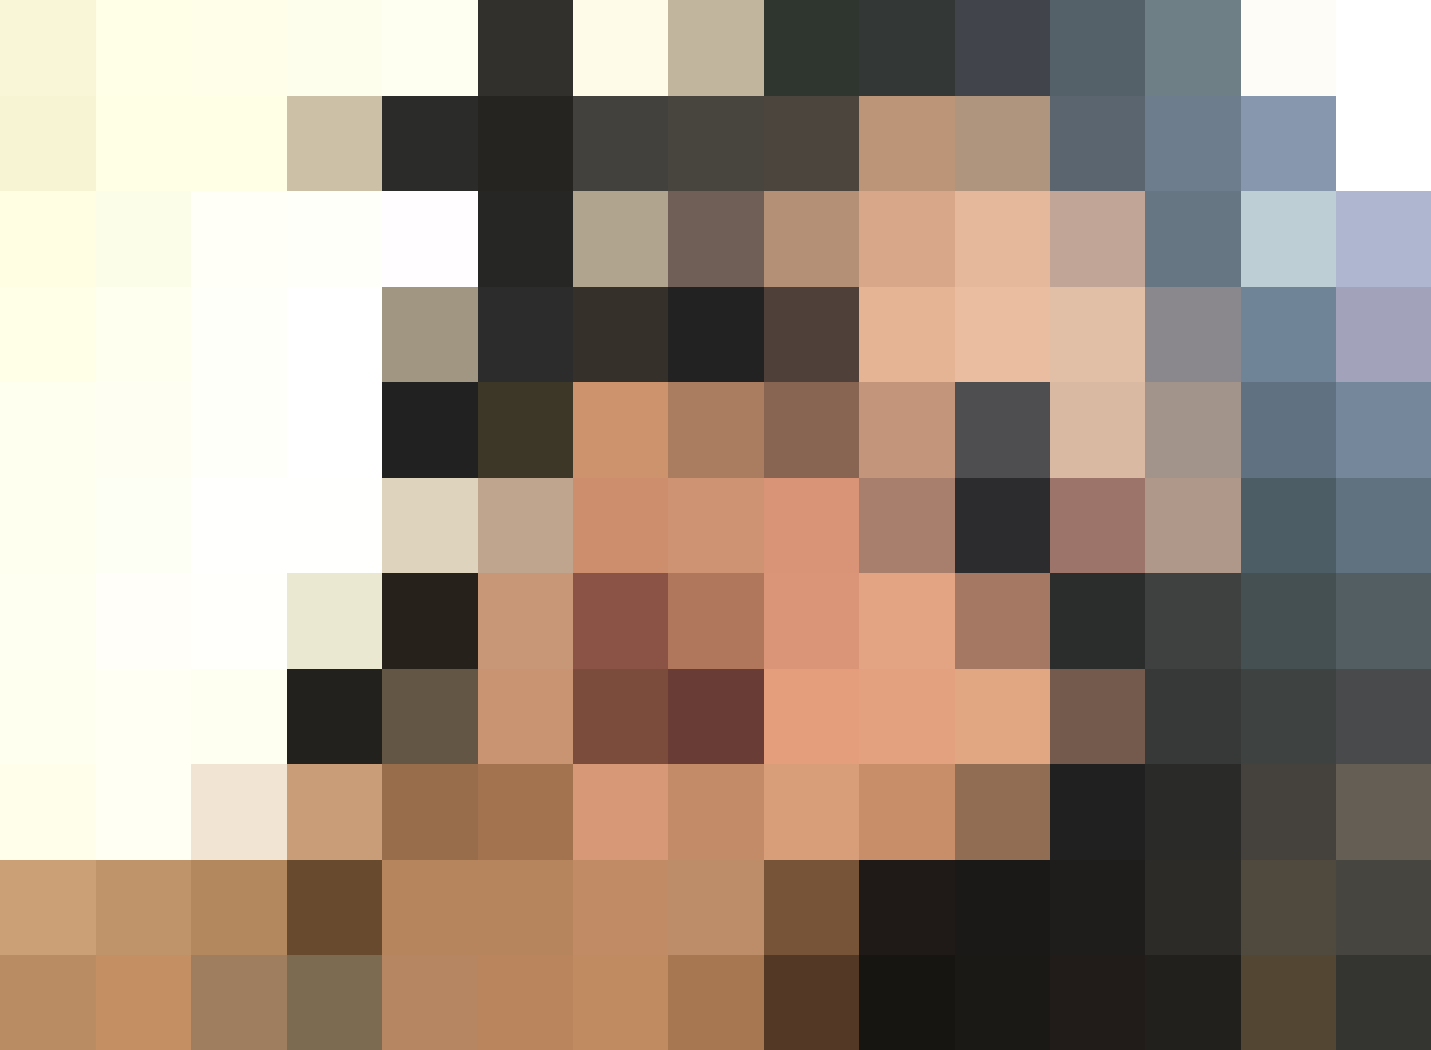

In [76]:
orig = 'https://pd1us.bumbcdn.com/p539/hidden?euri=1hw3jhYqXnoV.LCLpFIKHilCA8RamXARe2RbkB7EPjcTHm1gtVo4DtaClEBCoWJA3kyhhqnc74stBHRfDd877xvQmeZnlL1f50F0itNlb1syE4mNp4iNJv-YnzAUuGLs-ynEyh1skGxd3XNg.qwGiYq0jdJJQrSQQ70B2fuyMFeMTuHGrQyU1jmr4hDv-WX.nJ60ZFolu45d24r5l.GkLVfPteGbJW.gwR1yFUEIIJDta6ll00QJfQ&size=__size__&wm_size=72x72&wm_offs=1320x973&h=UhZ'
pixel = 'https://pd1us.bumbcdn.com/p539/hidden?euri=vkcJMBnGBIfneyfHHoBwnMmGfE0v010bXNz8ibTv5OAiUZiT-qgJwHlH98U2x.wI59FvRJnUOaAj6LCP0W4EP4crTSqCg2Rw.ridaoykREv0T9EGeEXTiou0aiOnNtit4VkhiGpPdXRIAXzwDsgzVZBMPXbcyt9QEPDLdhwdW3JAXHXALmOYp6dpxJ10.a2LYt5MfaKCwkG.gKvYQ8hS5oZUHQ3Rg4Mk109uPXUUQkGjAn6KS8uf.bNd7PNoElcU&size=__size__&wm_size=72x72&wm_offs=-5x-5&h=UhZ'

converted, score = compare_imgs(orig, pixel)

print(f'SSIM: {score}')

display(Image(url=pixel), show_img(converted))

SSIM: 0.9882907156121217


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


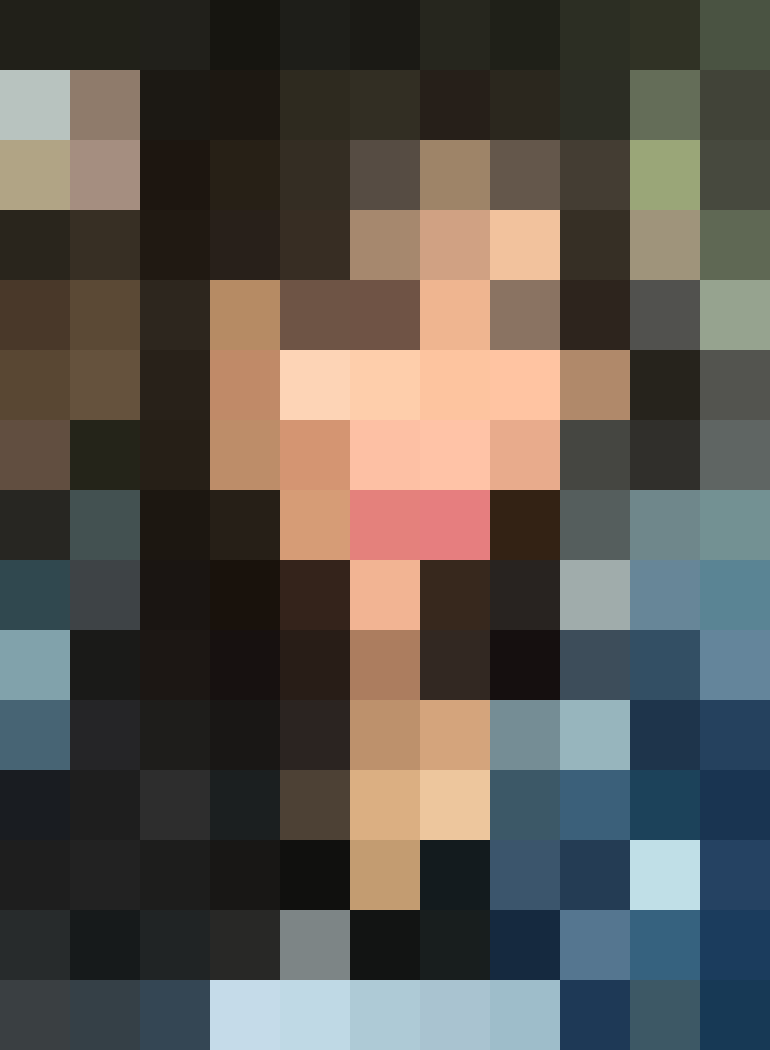

In [8]:
orig = 'https://pd1us.bumbcdn.com/p589/hidden?euri=B9LPh7AvbKsQqliab4ZiDMG3DfeSyGqnTH-Ys23rvzvLIwOc4c4jCqTMSVKYkvgRbiX7buMaKo5et95GpODnYSRx-tvhsK8go881sz4EKdbCZ1IQ6fJbqU.5V6v0Z6yJhuRNnrf2taFjbY3--Q8Ki966B2O02o0fXRXA9SwLoWMniyzq89Jw6EZdctF5uMGVqE3-S.RiKVjfRs2cPX8ZXotxYYv9R.3wRvuQWPWZIfy0k4brog1eag&size=__size__&wm_size=72x72&wm_offs=973x1320&h=N9R'
pixel = 'https://pd1us.bumbcdn.com/p589/hidden?euri=9ih6R5c2iPbrSdFJaV9ODSmIfBa56v3tVTOe57tmO3dSOjvh.8LroVu2ilXcukFZFImLcxnx8shn5UvySWsIoId6V2i1XHpjgFy5i1BV5buiXZmwaN0YBBwrKfKWnOVFJwGZDWyi85xyZGrFkXe1f7gokR5OZOuQMmRyworCOsmLodxwU5wYcB.N-LyIzNtAqHPu59w7cmdMPT461aDpSMv3bLqdrawQCHLUq1OankkVoivp1PVf5VT5zt.70a9o&size=__size__&wm_size=72x72&wm_offs=-5x-5&h=N9R'

converted, score = compare_imgs(orig, pixel)

print(f'SSIM: {score}')

display(Image(url=pixel), show_img(converted))